# Import Librairie

In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt

# Lecture / Create CSV book_info.csv

In [312]:
try:
    df = pd.read_csv('book_info.csv')
    print("dataset book_info.csv loaded!")
except Exception as e:
    print("Enable to load dataset book_info.csv")

    ############### lecture CSV ###################
    df_book = pd.read_csv('books.csv')
    df_book_tag = pd.read_csv('book_tags.csv')
    df_tag = pd.read_csv('tags.csv')

    ############### Genre en Fonction de tag_name ###################
    df_tag['new_tag'] = np.where(df_tag['tag_name'].str.contains('fanta'),'fantasy',
    np.where(df_tag['tag_name'].str.contains('nonfic'),'nonfikt',
    np.where(df_tag['tag_name'].str.contains('non-fic'),'nonfikt',
    np.where(df_tag['tag_name'].str.contains('polic'),'policier',
    np.where(df_tag['tag_name'].str.contains('polar'),'policier',
    np.where(df_tag['tag_name'].str.contains('science-fiction'),'sci-fict',
    np.where(df_tag['tag_name'].str.contains('sci-fi'),'sci-fict',    
    np.where(df_tag['tag_name'].str.contains('manga'),'manga',
    np.where(df_tag['tag_name'].str.contains('thrill'),'triller',
    np.where(df_tag['tag_name'].str.contains('politic'),'politique',
    np.where(df_tag['tag_name'].str.contains('roman'),'romance',
    np.where(df_tag['tag_name'].str.contains('humo'),'humoristique',
    np.where(df_tag['tag_name'].str.contains('travel'),'voyage',
    np.where(df_tag['tag_name'].str.contains('voyag'),'voyage',
    np.where(df_tag['tag_name'].str.contains('litte'),'classic',
    np.where(df_tag['tag_name'].str.contains('lite'),'classic',
    np.where(df_tag['tag_name'].str.contains('animal'),'animalier',
    np.where(df_tag['tag_name'].str.contains('dystop'),'dystopique',
    np.where(df_tag['tag_name'].str.contains('child'),'livre-enfant',
    np.where(df_tag['tag_name'].str.contains('histor'),'histoire',
    np.where(df_tag['tag_name'].str.contains('memoir'),'biographie',
    np.where(df_tag['tag_name'].str.contains('biograph'),'biographie',
    np.where(df_tag['tag_name'].str.contains('class'),'classic',
    np.where(df_tag['tag_name'].str.contains('sport'),'sport',
    np.where(df_tag['tag_name'].str.contains('comics'),'comics',
    np.where(df_tag['tag_name'].str.contains('war'),'guerre',
    np.where(df_tag['tag_name'].str.contains('religi'),'religion',
    np.where(df_tag['tag_name'].str.contains('serie'),'series',
    np.where(df_tag['tag_name'].str.contains('cultu'),'culturelle',
    np.where(df_tag['tag_name'].str.contains('food'),'alimentaire',
    np.where(df_tag['tag_name'].str.contains('suspen'),'suspence',
    np.where(df_tag['tag_name'].str.contains('myster'),'suspence', df_tag['tag_name']))))))))))))))))))))))))))))))))

    ############### Merge DF_tag et DF_book_tag par paquet de 25 ###################
    df_book_tag = df_book_tag.groupby('goodreads_book_id').head(25).reset_index(drop=True)
    df = df_book_tag.merge(df_tag, on='tag_id', how='left')

    ############### Create feature new tag ###################
    df = df[(df["new_tag"]=='fantasy')
        |(df["new_tag"]=='biographie')|(df["new_tag"]=='sci-fict')
        |(df["new_tag"]=='manga')|(df["new_tag"]=='triller')
        |(df["new_tag"]=='politique')|(df["new_tag"]=='romance')
        |(df["new_tag"]=='humoristique')|(df["new_tag"]=='voyage')
        |(df["new_tag"]=='animalier')|(df["new_tag"]=='suspence')
        |(df["new_tag"]=='histoire')|(df["new_tag"]=='dystopique')
        |(df["new_tag"]=='classic')|(df["new_tag"]=='sport')
        |(df["new_tag"]=='livre-enfant')|(df["new_tag"]=='policier')
        |(df["new_tag"]=='comics')|(df["new_tag"]=='alimentaire')
        |(df["new_tag"]=='religion')|(df["new_tag"]=='guerre')
        |(df["new_tag"]=='series')|(df["new_tag"]=='culturelle')]
    df = df.groupby('goodreads_book_id').head(1).reset_index(drop=True)
    display(df.info())
    try:
        df_xml = pd.read_csv('xml_description.csv')
        print("dataset xml_description.csv loaded!")
    except Exception as e:
        print("Enable to load dataset xml_description.csv")

        ############# Creation dataset xml_description.csv ######################
        data = []
        for index in df_book['goodreads_book_id']:
            id_xml = str(index) + ".xml"
            tree = ET.parse(id_xml)
            xml = tree.getroot()
            count = 0
            for description in xml.iter('description'):
                if count == 0:
                    count = count + 1
                    dic_descrip = {'goodreads_book_id': index, 'description': description.text}
                    data.append(dic_descrip)
                    #print(dic_descrip)
                else:
                    count = 0
        colonne = ['goodreads_book_id', 'description']
        df_xml = pd.DataFrame(data,columns=colonne)
        df_xml = df_xml.groupby('goodreads_book_id').head(1).reset_index(drop=True)
        df_xml.to_csv('xml_description.csv')
        display(df_xml.info())
        ###################### Creation CSV Book + Genre + description ##############
    df = df.merge(df_xml, on='goodreads_book_id', how='left')
    df = df.merge(df_book, on='goodreads_book_id', how='right')

        ###################### Creation CSV book_info.csv ##############
    df.to_csv('book_info.csv')
    print('dataset book_info.csv register')
        

Enable to load dataset book_info.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   goodreads_book_id  9712 non-null   int64 
 1   tag_id             9712 non-null   int64 
 2   count              9712 non-null   int64 
 3   tag_name           9712 non-null   object
 4   new_tag            9712 non-null   object
dtypes: int64(3), object(2)
memory usage: 379.5+ KB


None

Enable to load dataset xml_description.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   goodreads_book_id  10000 non-null  int64 
 1   description        9685 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


None

dataset book_info.csv register


# TF IDF Sklearn

In [1015]:
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords ##  stopwords dans différentes langues
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [1027]:
df = pd.read_csv('book_info.csv')
df['new_tag'] = df['new_tag'].fillna('autre')
df['text'] = df['description']
df[['text']] = df[['text']].astype(str)
#display(df[50:70])

# Visualisation Distribution new_tag

In [1017]:
print(df['new_tag'].value_counts())
#df['new_tag'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

fantasy         1793
romance         1358
classic         1193
histoire        1066
suspence        1048
livre-enfant     491
biographie       448
triller          443
sci-fict         439
autre            288
humoristique     252
comics           231
religion         195
series           170
dystopique       142
manga            101
alimentaire       87
guerre            62
politique         60
voyage            53
sport             34
animalier         34
culturelle        12
Name: new_tag, dtype: int64


# Pre_processing

In [1028]:
def pre_process(text):
    # Function for removing NonAscii characters
    text = "".join(i for i in text if  ord(i)<128)

    # lowercase
    text=text.lower()

    # Stop Words
    text = text.split()
    stops = stopwords.words("english")
    stops.append('story')
    stops.append('br')
    stops.append('b')
    stops.append('en')
    text = [w for w in text if not w in stops]
    text = " ".join(text)
        
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)

    # remove html
    html_pattern = re.compile('<.*?>')
    text = html_pattern.sub(r'', text)

    return text

df['text'] = df['text'].apply(lambda x:pre_process(x))

In [1050]:
#display(df.head())

# Function for recommending books based on Book title. It takes book Title and genre as an input.

In [1098]:
def recommend_title(title, genre, leng, sel_book=0, author=True):
    # title ==> title of book
    # genre ==> category of book
    # leng ==> nbr of book
    # sel_book ==> phase of recommendation
    # authors ==> author of book

    #####
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['new_tag'] == genre]
    data.reset_index(level = 0, inplace = True) 
    

    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    # name of authors
    var_author = data['authors'][indices[title]]
    print(var_author)

    # dataset with selected author
    if author == True:
        dt = data.loc[data['authors'] == var_author]
        ### secu si <=2 lignes ##########
        if len(dt) <= 2:
            dt = data
            # recommend 1
            # sel_book==0 ==> 2 books
            if sel_book == 0:
                sel = 1
            # recommend 2
            # sel_book==4 ==> 3 books
            elif sel_book == 4:
                sel = 0
            # recommend 3
            # sel_book==7 ==> 1 books
            elif sel_book == 7:
                sel = 0
            # recommend 3
            # sel_book==11 ==> 1 books
            elif sel_book == 11:
                sel = 0
            # recommend 4
            # sel_book==13 ==> 1 books
            elif sel_book == 13:
                sel = 0
            # recommend 4
            # sel_book==15 ==> 1 books
            elif sel_book == 15:
                sel = 0
            # recommend 4
            # sel_book==17 ==> 1 books
            elif sel_book == 17:
                sel = 0
        else:
            # recommend 1
            # sel_book==0 ==> 2 books
            if sel_book == 0:
                sel = 1
            # recommend 2
            # sel_book==4 ==> 3 books
            elif sel_book == 4:
                sel = 0
            # recommend 3
            # sel_book==7 ==> 3 books
            elif sel_book == 7:
                sel = 0
            # recommend 3
            # sel_book==11 ==> 1 books
            elif sel_book == 11:
                sel = 0
            # recommend 4
            # sel_book==13 ==> 1 books
            elif sel_book == 13:
                sel = 0
            # recommend 4
            # sel_book==15 ==> 1 books
            elif sel_book == 15:
                sel = 0
            # recommend 4
            # sel_book==17 ==> 1 books
            elif sel_book == 17:
                sel = 0
    # dataset without selected author   
    elif author == False :
        if len(data.loc[data['authors'] == var_author]) <=2:
            dt = data
            # recommend 1
            # sel_book==1 ==> 1 book
            if sel_book == 1:
                sel = 3
            # recommend 3
            # sel_book==9 ==> 1 book
            elif sel_book == 9:
                sel = 0
        else:
            # concate dataframe book reference with select. without author
            df_ref_book = data[data['title'] == title]
            dt = data.loc[data['authors'] != var_author]
            dt = pd.concat([dt, df_ref_book])
            # recommend 1
            # sel_book==1 ==> 1 book
            if sel_book == 1:
                sel = 1
            # recommend 3
            # sel_book==9 ==> 1 book
            elif sel_book == 9:
                sel = 0
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(dt['title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
    idx = indices[title]
    
    dt.reset_index(level = 0, inplace = True)
    idx = dt[dt['level_0']==idx].index.tolist()[0]
    
    #display(dt)

    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))

    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)

    # Scores of the nbr == leng most similar books 
    sig = sig[sel:leng+sel]

    # Book indicies
    movie_indices = [i[0] for i in sig]
    movie_indices = list([dt['index'].iloc[i] for i in movie_indices])

    # Top nbr == leng book recommendation
    rec = df[['title', 'small_image_url', 'authors', 'average_rating']].iloc[movie_indices]
       
    # It reads the top nbr == leng recommend book url and print the images
    
    for i in rec['small_image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))
    
    return rec

Brandon Sanderson
AxesImage(54,36;334.8x217.44)


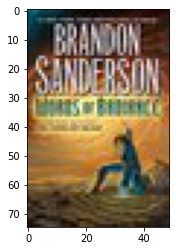

In [1128]:
#df_cont1 = recommend_title("Jarka Ruus (High Druid of Shannara, #1)", "fantasy", 1, 7, True)
df_cont1 = recommend_title("Words of Radiance (The Stormlight Archive, #2)", "fantasy", 1, 13, True)


In [1127]:
display(df_cont1)

,title,small_image_url,authors,average_rating
861,"Words of Radiance (The Stormlight Archive, #2)",https://images.gr-assets.com/books/1391535251s...,Brandon Sanderson,4.77


# Function for recommending books based on Book title. It takes book description and genre as an input.

In [1087]:
def recommend_descrip(title, genre, leng, sel_book, author=True):
    # title ==> title of book
    # genre ==> category of book
    # leng ==> nbr of book
    # sel_book ==> phase of recommendation
    # authors ==> author of book

    #####
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['new_tag'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    # name of authors
    var_author = data['authors'][indices[title]]
    print(var_author)
    # dataset with or without selected author
    if author == True:
        dt = data.loc[data['authors'] == var_author]
        
        ### secu si 1 ligne ##########
        if len(dt) <= 3:
            dt = data
            # recommend n°1
            # sel_book==2 ==> 3 books
            if sel_book == 2:
                sel = 1
            # recommend n°2
            # sel_book==5 ==> 3 books
            elif sel_book == 5:
                sel = 1
            # recommend n°3
            # sel_book==8 ==> 2 books
            elif sel_book == 8:
                sel = 1
            # recommend n°3
            # sel_book==12 ==> 2 books
            elif sel_book == 12:
                sel = 1
            # recommend n°4
            # sel_book==14 ==> 2 books
            elif sel_book == 14:
                sel = 1
            # recommend n°
            # sel_book==16 ==> 2 books
            elif sel_book == 16:
                sel = 1
            # recommend n°4
            # sel_book==18 ==> 2 books
            elif sel_book == 18:
                sel = 1
        else:
            # recommend n°1
            # sel_book==1 ==> 3 books
            if sel_book == 2:
                sel = 1
            # recommend n°2
            # sel_book==5 ==> 3 books
            elif sel_book == 5:
                sel = 1
            # recommend n°3
            # sel_book==8 ==> 1 books
            elif sel_book == 8:
                sel = 1
            # recommend n°3
            # sel_book==12 ==> 2 books
            elif sel_book == 12:
                sel = 1
            # recommend n°4
            # sel_book==14 ==> 2 books
            elif sel_book == 14:
                sel = 1
            # recommend n°
            # sel_book==16 ==> 2 books
            elif sel_book == 16:
                sel = 1
            # recommend n°4
            # sel_book==18 ==> 2 books
            elif sel_book == 18:
                sel = 1
    elif author == False:
        if len(data.loc[data['authors'] == var_author]) <=3:
            dt = data
            # recommend n°1
            # sel_book==3 ==> 3 books
            if sel_book == 3:
                sel = 4
            # recommend n°2
            # sel_book==6 ==> 3 books
            elif sel_book == 6:
                sel = 4
            # recommend n°3
            # sel_book==10 ==> 2 books
            elif sel_book == 10:
                sel = 1
        else:
            df_ref_book = data[data['title'] == title]
            dt = data.loc[data['authors'] != var_author]
            dt = pd.concat([dt, df_ref_book])
            # recommend n°1
            # sel_book==3 ==> 3 books
            if sel_book == 3:
                sel = 1
            # recommend n°2
            # sel_book==6 ==> 3 books
            elif sel_book == 6:
                sel = 1
            # recommend n°3
            # sel_book==10 ==> 2 books
            elif sel_book == 10:
                sel = 1
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(dt['text'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
    idx = indices[title]
    dt.reset_index(level = 0, inplace = True)
    idx = dt[dt['level_0']==idx].index.tolist()[0]
        
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)

    # Scores of the nbr == leng most similar books
    sig = sig[sel:leng+sel]

    # Book indicies
    movie_indices = [i[0] for i in sig]
    movie_indices = list([dt['index'].iloc[i] for i in movie_indices])

    # Top nbr == leng book recommendation
    rec = df[['title', 'small_image_url', 'authors', 'average_rating']].iloc[movie_indices]
        
    # It reads the top nbr == leng recommend book url and print the images
    for i in rec['small_image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))
    #display(rec)
    return rec

Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


,title,small_image_url,authors,average_rating
561,"The Way of Kings (The Stormlight Archive, #1)",https://images.gr-assets.com/books/1388184640s...,Brandon Sanderson,4.64
3146,"The Rithmatist (The Rithmatist, #1)",https://s.gr-assets.com/assets/nophoto/book/50...,Brandon Sanderson,4.25


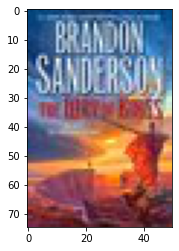

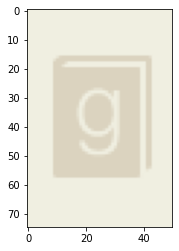

In [1081]:
#Harry Potter and the Sorcerer's Stone (Harry Potter, #1)  
#recommend_descrip("Jarka Ruus (High Druid of Shannara, #1)", "fantasy", 2, 2, True)
recommend_descrip("Words of Radiance (The Stormlight Archive, #2)", "fantasy", 2, 8, True)

In [1107]:
def content_base_1(df, title):
    # df ==> dataframe to use
    # title ==> title of book

    ##### dataframe to use
    data = df
    
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    # name of genre
    var_genre = data['new_tag'][indices[title]]
    
    # Top 2 book recommendation title with a same author
    rec_title_with_author = recommend_title(title, var_genre, 2, 0, True)
    
    # Top 1 book recommendation title with other authors
    rec_title_without_author = recommend_title(title, var_genre, 1, 1, False)
    
    # Top 3 book recommendation description with a same author
    rec_desc_with_author = recommend_descrip(title, var_genre, 3, 2, True)
    
    # Top 3 book recommendation description with other authors
    rec_desc_without_author = recommend_descrip(title, var_genre, 3, 3, False)
    
    rec_content_1 = pd.concat([rec_title_with_author, rec_title_without_author, rec_desc_with_author,                                                 rec_desc_without_author])
    #rec_content_1 = pd.concat([rec_title, rec_desc_with_author])

    #display(rec_content_1)
    dic_book = rec_content_1.to_dict('records')
    return dic_book

Alice Sebold
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Alice Sebold
AxesImage(54,36;334.8x217.44)
Alice Sebold
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Alice Sebold
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


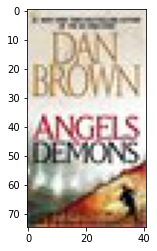

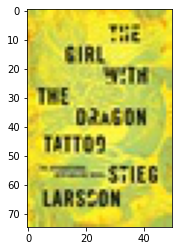

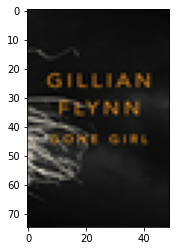

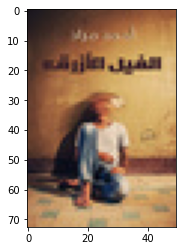

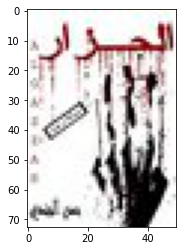

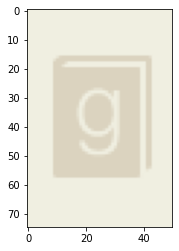

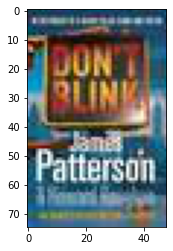

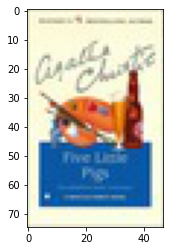

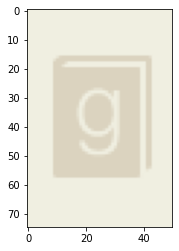

In [1124]:
dic_book_content_1 = content_base_1(df, "The Lovely Bones")
#dic_book_content_1 = content_base_1(df, "The Lovely Bones")


In [1120]:
display(dic_book_content_1)

[{'title': 'Angels & Demons  (Robert Langdon, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1303390735s/960.jpg',
  'authors': 'Dan Brown',
  'average_rating': 3.85},
 {'title': 'The Girl with the Dragon Tattoo (Millennium, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1327868566s/2429135.jpg',
  'authors': 'Stieg Larsson, Reg Keeland',
  'average_rating': 4.11},
 {'title': 'Gone Girl',
  'small_image_url': 'https://images.gr-assets.com/books/1339602131s/8442457.jpg',
  'authors': 'Gillian Flynn',
  'average_rating': 4.03},
 {'title': 'الفيل الأزرق',
  'small_image_url': 'https://images.gr-assets.com/books/1485105416s/16031620.jpg',
  'authors': 'أحمد مراد',
  'average_rating': 3.8},
 {'title': 'الجزار',
  'small_image_url': 'https://images.gr-assets.com/books/1270726397s/7701043.jpg',
  'authors': 'حسن الجندي',
  'average_rating': 4.11},
 {'title': 'Forever Odd (Odd Thomas, #2)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-

In [997]:
def content_base_2(df, cat1):
    # df ==> dataframe to use
    # cat1 ==> selection category


    #### dataframe to use
    data = df
    data = data.loc[df['new_tag'] == cat1].sort_values(by = 'average_rating', ascending = False)
    data.reset_index(level = 0, inplace = True)

    # name of title
    title = data['title'][0]
    print(title)

    # Top 3 book recommendation title
    rec_title = recommend_title(title, cat1, 3, 4, True)
    
    # Top 3 book recommendation description with a same author
    rec_desc_with_author = recommend_descrip(title, cat1, 3, 5, True)
    
    # Top 3 book recommendation description with other authors
    rec_desc_without_author = recommend_descrip(title, cat1, 3, 6, False)
    
    rec_content_1 = pd.concat([rec_title, rec_desc_with_author, rec_desc_without_author])
    #rec_content_1 = pd.concat([rec_title, rec_desc_with_author])
    dic_book = rec_content_1.to_dict('records')
    return dic_book

Words of Radiance (The Stormlight Archive, #2)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


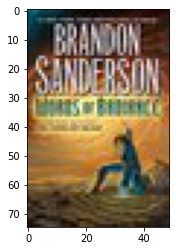

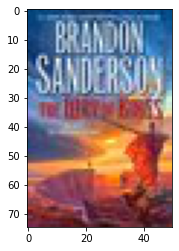

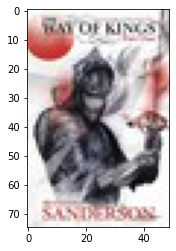

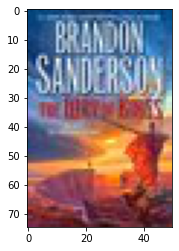

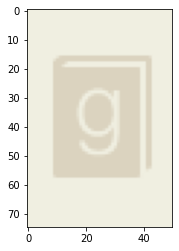

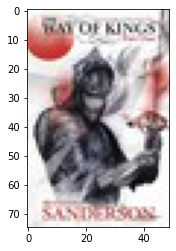

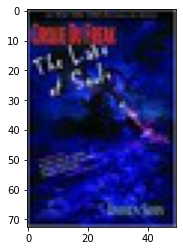

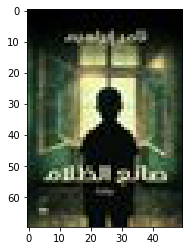

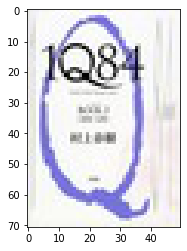

In [1123]:
dic_book_content_2 = content_base_2(df, "fantasy")

In [1118]:
display(dic_book_content_2)

[{'title': 'Words of Radiance (The Stormlight Archive, #2)',
  'small_image_url': 'https://images.gr-assets.com/books/1391535251s/17332218.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.77},
 {'title': 'The Way of Kings (The Stormlight Archive, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1388184640s/7235533.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.64},
 {'title': 'The Way of Kings, Part 1 (The Stormlight Archive #1.1)',
  'small_image_url': 'https://images.gr-assets.com/books/1357609842s/9329354.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.67},
 {'title': 'The Way of Kings (The Stormlight Archive, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1388184640s/7235533.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.64},
 {'title': 'The Rithmatist (The Rithmatist, #1)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png',
  'authors':

In [1082]:
def content_base_3(df, cat1, cat2):
    # df ==> dataframe to use
    # cat1 ==> selection category


    #### dataframe to use
    data = df

    #### dataframe to use for cat1
    data_cat1 = data.loc[df['new_tag'] == cat1].sort_values(by = 'average_rating', ascending = False)
    data_cat1.reset_index(level = 0, inplace = True)

    #### dataframe to use for cat2
    data_cat2 = data.loc[df['new_tag'] == cat2].sort_values(by = 'average_rating', ascending = False)
    data_cat2.reset_index(level = 0, inplace = True)

    # name of title cat 1 first book
    title_1 = data_cat1['title'][0]
    print(title_1)

    # name of title cat 1 second book
    title_2 = data_cat1['title'][1]
    print(title_2)

    # name of title cat 2 
    title_3 = data_cat2['title'][0]
    print(title_3)

    # Top 1 book recommendation title cat 1
    rec_title_cat1_bk1 = recommend_title(title_1, cat1, 1, 7, True)

    # Top 1 book recommendation title cat 1
    rec_desc_cat1_bk1 = recommend_descrip(title_1, cat1, 2, 8, True)

    # Top 2 book recommendation title cat 1
    rec_title_cat1_bk2 = recommend_title(title_2, cat1, 1, 9, False)

    # Top 2 book recommendation title cat 1
    rec_desc_cat1_bk2 = recommend_descrip(title_2, cat1, 2, 10, False)
    
    # Top 1 book recommendation title cat 2
    rec_title_cat2_bk1 = recommend_title(title_3, cat2, 1, 11, True)

    # Top 1 book recommendation title cat 1
    rec_desc_cat2_bk1 = recommend_descrip(title_3, cat2, 2, 12, True)
    
    rec_content_1 = pd.concat([rec_title_cat1_bk1, rec_desc_cat1_bk1
                            , rec_title_cat1_bk2, rec_desc_cat1_bk2
                            , rec_title_cat2_bk1, rec_desc_cat2_bk1])
    #rec_content_1 = pd.concat([rec_title, rec_desc_with_author])
    dic_book = rec_content_1.to_dict('records')
    return dic_book

Words of Radiance (The Stormlight Archive, #2)
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
The Annotated Sherlock Holmes: The Four Novels and the Fifty-Six Short Stories Complete (2 Volume Set)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
J.K. Rowling, Mary GrandPré
AxesImage(54,36;334.8x217.44)
J.K. Rowling, Mary GrandPré
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Arthur Conan Doyle, William S. Baring-Gould
AxesImage(54,36;334.8x217.44)
Arthur Conan Doyle, William S. Baring-Gould
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


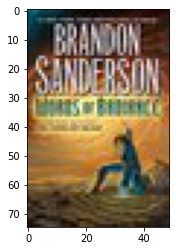

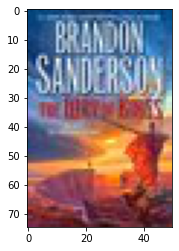

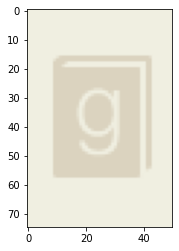

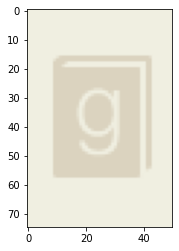

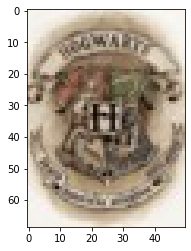

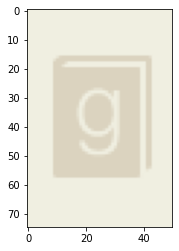

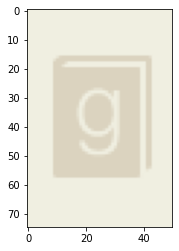

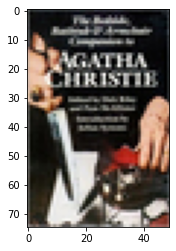

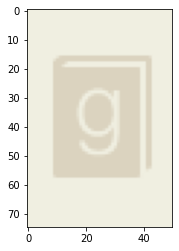

In [1122]:
dic_book_content_3 = content_base_3(df, "fantasy", "suspence")

In [1116]:
display(dic_book_content_3)

[{'title': 'Words of Radiance (The Stormlight Archive, #2)',
  'small_image_url': 'https://images.gr-assets.com/books/1391535251s/17332218.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.77},
 {'title': 'The Way of Kings (The Stormlight Archive, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1388184640s/7235533.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.64},
 {'title': 'The Rithmatist (The Rithmatist, #1)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.25},
 {'title': 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png',
  'authors': 'J.K. Rowling, Mary GrandPré',
  'average_rating': 4.77},
 {'title': 'Harry Potter Boxset (Harry Potter, #1-7)',
  'small_image_url': 'https://images.gr-assets.com/books/13925

In [1101]:
def content_base_4(df, cat1, cat2, cat3):
    # df ==> dataframe to use
    # cat1 ==> selection category


    #### dataframe to use
    data = df

    #### dataframe to use for cat1
    data_cat1 = data.loc[df['new_tag'] == cat1].sort_values(by = 'average_rating', ascending = False)
    data_cat1.reset_index(level = 0, inplace = True)

    #### dataframe to use for cat2
    data_cat2 = data.loc[df['new_tag'] == cat2].sort_values(by = 'average_rating', ascending = False)
    data_cat2.reset_index(level = 0, inplace = True)

    #### dataframe to use for cat3
    data_cat3 = data.loc[df['new_tag'] == cat3].sort_values(by = 'average_rating', ascending = False)
    data_cat3.reset_index(level = 0, inplace = True)

    # name of title cat 1 first book
    title_1 = data_cat1['title'][0]
    print(title_1)

    # name of title cat 1 second book
    title_2 = data_cat2['title'][0]
    print(title_2)

    # name of title cat 2 
    title_3 = data_cat3['title'][0]
    print(title_3)

    # Top 1 book recommendation title cat 1
    rec_title_cat1_bk1 = recommend_title(title_1, cat1, 1, 13, True)

    # Top 1 book recommendation title cat 1
    rec_desc_cat1_bk1 = recommend_descrip(title_1, cat1, 2, 14, True)

    # Top 1 book recommendation title cat 2
    rec_title_cat2_bk2 = recommend_title(title_2, cat2, 1, 15, True)

    # Top 1 book recommendation title cat 2
    rec_desc_cat2_bk2 = recommend_descrip(title_2, cat2, 2, 16, True)
    
    # Top 1 book recommendation title cat 3
    rec_title_cat3_bk3 = recommend_title(title_3, cat3, 1, 17, True)

    # Top 1 book recommendation title cat 3
    rec_desc_cat3_bk3 = recommend_descrip(title_3, cat3, 2, 18, True)
    
    rec_content_1 = pd.concat([rec_title_cat1_bk1, rec_desc_cat1_bk1
                            , rec_title_cat2_bk2, rec_desc_cat2_bk2
                            , rec_title_cat3_bk3, rec_desc_cat3_bk3])
    #rec_content_1 = pd.concat([rec_title, rec_desc_with_author])
    dic_book = rec_content_1.to_dict('records')
    return dic_book

Words of Radiance (The Stormlight Archive, #2)
The Annotated Sherlock Holmes: The Four Novels and the Fifty-Six Short Stories Complete (2 Volume Set)
The Green Mile, Part 6: Coffey on the Mile
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
Brandon Sanderson
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Arthur Conan Doyle, William S. Baring-Gould
AxesImage(54,36;334.8x217.44)
Arthur Conan Doyle, William S. Baring-Gould
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
Stephen King
AxesImage(54,36;334.8x217.44)
Stephen King
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


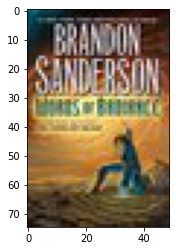

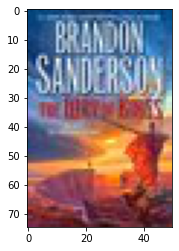

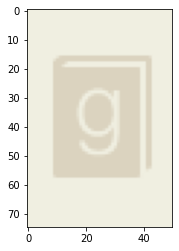

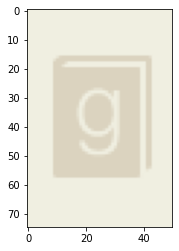

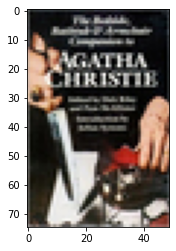

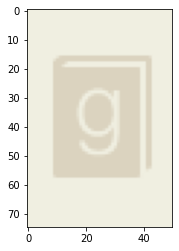

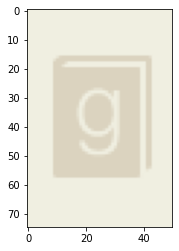

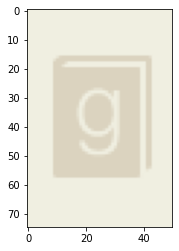

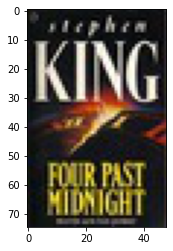

In [1129]:
dic_book_content_4 = content_base_4(df, "fantasy", "suspence", "triller")

In [1130]:
display(dic_book_content_4)

[{'title': 'Words of Radiance (The Stormlight Archive, #2)',
  'small_image_url': 'https://images.gr-assets.com/books/1391535251s/17332218.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.77},
 {'title': 'The Way of Kings (The Stormlight Archive, #1)',
  'small_image_url': 'https://images.gr-assets.com/books/1388184640s/7235533.jpg',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.64},
 {'title': 'The Rithmatist (The Rithmatist, #1)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png',
  'authors': 'Brandon Sanderson',
  'average_rating': 4.25},
 {'title': 'The Annotated Sherlock Holmes: The Four Novels and the Fifty-Six Short Stories Complete (2 Volume Set)',
  'small_image_url': 'https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png',
  'authors': 'Arthur Conan Doyle, William S. Baring-Gould',
  'average_rating': 4.58},
 {'title': 'The New Bedside, Bathtub and Armchair Com